# PFA analysis

In [ ]:
https://github.com/LauritzR/Principal-Feature-Analysis

In [ ]:
https://github.com/AC-PHD/Seurat_PFA_pipeline

# Prepare environment


In [ ]:
!conda create -n PFA python=3.8 -y

In [ ]:
!conda activate PFA

In [ ]:
!conda install -n PFA csv random os ipython -y

In [ ]:
!conda install -n PFA ipykernel -y

In [ ]:
!python -m ipykernel install --user --name PFA --display-name "Python (PFA)"

In [ ]:
!conda install -c anaconda pandas

In [ ]:
!conda install -c bioconda scanpy

In [ ]:
!conda install -c anaconda requests

In [ ]:
!

# Prepare the PFA input matrix

In [363]:
import scanpy as sc
import pandas as pd
import anndata as ad
import os

## Load and subset the adata object

In [364]:
#adata = sc.read("/storage/users/data/PANC/time_adata.h5ad")
adata = sc.read("/storage/users/data/PANC/annotated_adata.h5ad")
#adata = sc.read("/storage/users/data/PANC/clustered_adata.h5ad")

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [365]:
adata

AnnData object with n_obs × n_vars = 10594 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'index', 'IDs'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Look which conditions are there

In [366]:
adata

AnnData object with n_obs × n_vars = 10594 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'index', 'IDs'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [367]:
# get possible group
adata.obs["leiden"]
#['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']

barcode
AAACCCAGTAGGCTCC-1     1
AAACCCAGTCGCAACC-1    11
AAACCCATCCACAAGT-1     5
AAACGCTTCACTACGA-1     8
AAACGCTTCAGCCTCT-1     6
                      ..
TTTACTGTCATTACTC-1    14
TTTCACAGTGATATAG-1     3
TTTCACATCGATGCAT-1     3
TTTCATGTCCCTCTAG-1     7
TTTGACTGTTCCGGTG-1     3
Name: leiden, Length: 10594, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']

## Assign new PFA groups

### Filter here the conditions, pseudotimes, leiden clusters, ...

#### Regex match 

In [283]:
# Define a function to assign groups based on the "condition" column
def assign_pfa_group(condition):
    # Check if any of the specified substrings is in condition
    if any(ctrl in condition for ctrl in ['2', '7', '14']):
        print(condition)
        return 0
    elif any(tgfb in condition for tgfb in ['3','15']):  # Adjusted based on your example data
        print(condition)
        return 1
    else:
        return None  # or -1 or another value, depending on how you want to handle conditions that don't match

# Apply the function to each entry in the "condition" column to create the "pfa_group"
adata.obs['pfa_group'] = adata.obs['leiden'].apply(assign_pfa_group)

2
3
7
12
13
14
15
17


#### Excat match

In [368]:
# Define a function to assign groups based on the "condition" column
def assign_pfa_group(condition):
    # Check for exact matches
    if condition in ['2', '7', '14']:
        print(condition)
        return 0
    elif condition in ['3','15']:  # For exact match, this is simplified
        print(condition)
        return 1
    else:
        return None  # or -1 or another value, depending on how you want to handle conditions that don't match

# Apply the function to each entry in the "condition" column to create the "pfa_group"
adata.obs['pfa_group'] = adata.obs['leiden'].apply(assign_pfa_group)

2
3
7
14
15


In [369]:
# Filter the adata object to keep only entries with pfa_group 0 or 1
adata_filtered = adata[adata.obs['pfa_group'].isin([0, 1])].copy()

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [370]:
adata_filtered

AnnData object with n_obs × n_vars = 2896 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'index', 'IDs', 'pfa_group'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [371]:
# Get unique pfa_groups from filtered_adata
unique_pfa_groups = adata_filtered.obs['pfa_group'].unique()

# Print the unique pfa_groups
print(unique_pfa_groups)

[1. 0.]


## Prepare the Group-Annotation of the Count Matrix

In [372]:
# Create a DataFrame for the Leiden annotation
annotation_series = pd.Series(adata_filtered.obs['pfa_group'], name='Label')

In [373]:
# Extract the count matrix from adata
count_matrix = adata_filtered.X

count_matrix = count_matrix.T

# Convert the count matrix to a DataFrame with genes as rows and samples as columns
count_df = pd.DataFrame(count_matrix.toarray(), index=adata_filtered.var_names, columns=adata_filtered.obs_names)

# Add the Leiden annotation as the first row
count_df = pd.concat([annotation_series.to_frame().T, count_df], axis=0)

count_df = count_df[count_df.index.notnull() & (count_df.index != '')]


In [374]:
count_df

barcode,AAGCGTTAGCCTCGTG-1,ATCGGATGTTGAGGAC-1,CATGGATGTGTATCCA-1,CCACGAGTCCCATAAG-1,CCGAACGAGAAACACT-1,CCGGACAGTCGACGCT-1,CGAGGCTAGAACTGAT-1,CGCCAGATCTAGAACC-1,CGCCATTAGAACGTGC-1,CGGAATTAGAGCAAGA-1,...,TTGTGGATCTAGCAAC-1,TTGTTCACAGGTCAAG-1,TTGTTTGAGCTCATAC-1,TTTACGTTCAAGGCTT-1,TTTACTGCAGCTACAT-1,TTTACTGTCATTACTC-1,TTTCACAGTGATATAG-1,TTTCACATCGATGCAT-1,TTTCATGTCCCTCTAG-1,TTTGACTGTTCCGGTG-1
Label,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
HES4,1.982747,2.213767,0.778701,1.961813,1.183782,1.786503,0.560981,1.390868,2.051576,1.494525,...,1.621794,2.052788,2.241301,0.000000,1.883256,2.679670,1.877891,1.520372,1.049049,0.763774
ISG15,0.760183,1.773268,0.000000,0.798606,0.000000,0.603272,0.918202,0.000000,0.000000,0.622888,...,0.000000,0.000000,1.335489,0.000000,1.050225,1.127936,0.802469,0.000000,0.000000,0.763774
C1QTNF12,0.000000,0.000000,0.000000,0.000000,0.000000,1.461486,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TNFRSF9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.479658,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PNMA5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BGN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.046113,0.000000,0.000000,0.000000
ATP2B3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L1CAM,0.760183,0.000000,0.000000,0.000000,0.920735,0.603272,0.918202,0.696199,0.856978,0.622888,...,0.000000,1.480421,1.335489,0.000000,0.657078,0.715220,0.479658,2.097755,0.000000,0.000000


## Test if counts of the groups in adata and new count_df are the same

### For adata_filtered

In [375]:
adata_filtered

AnnData object with n_obs × n_vars = 2896 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'index', 'IDs', 'pfa_group'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [376]:
import pandas as pd
import numpy as np

# Extract the counts for "LHFPL3-AS2" across all cells
gene_counts = adata_filtered[:, adata_filtered.var_names == "LINC02223"].X

# Convert to dense format if necessary
if hasattr(gene_counts, "toarray"):
    gene_counts = gene_counts.toarray().squeeze()

# Convert gene counts to a pandas Series for easier manipulation
gene_counts_series = pd.Series(gene_counts)

# Add the conditions from adata.obs as an index to the Series
gene_counts_series.index = adata_filtered.obs['leiden']

# Calculate the average count per condition
average_counts_per_condition = gene_counts_series.groupby(level=0).mean()

print("Average counts for '    ' per group:")
print(average_counts_per_condition)

Average counts for '    ' per group:
leiden
2     0.000732
3     0.001530
7     0.000000
14    0.002649
15    0.000000
dtype: float32


### For count_df

In [377]:
df = count_df.T
# Group by the first column and calculate the mean of column 2 for each group
average_values = df.groupby(df.iloc[:, 0]).mean()

# Since you're interested in the average values of column 2 specifically
#"LINC02223"
average_column_2 = average_values.iloc[:, 469]
#average_column_2 = average_values['LINC02223']

print("Average of column 2 for each group in the first column:")
print(average_column_2)

Average of column 2 for each group in the first column:
Label
0.0    0.000852
1.0    0.001338
Name: LINC02223, dtype: float64


In [378]:
average_values

,Label,HES4,ISG15,C1QTNF12,TNFRSF9,LINC01647,TNFRSF8,KAZN,SLC25A34-AS1,TMEM82,...,FHL1,FGF13,LINC00632,GABRA3,ZNF185,PNMA5,BGN,ATP2B3,L1CAM,MT-CO2
Label,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,1.867856,0.478415,0.055442,0.011104,0.0,0.010373,0.109202,0.000821,0.000554,...,0.039408,0.103442,0.004712,0.033275,0.679233,0.001104,0.099962,0.001789,0.574297,4.361583
1.0,1.0,1.916253,0.527434,0.064110,0.011377,0.0,0.005280,0.079042,0.000000,0.000000,...,0.097100,0.100482,0.004202,0.018895,0.798120,0.000000,0.065852,0.003010,0.545550,4.532542


## Test if group advice worked out

In [379]:
import pandas as pd

# Assuming count_df is your DataFrame with barcodes as column names and the first row indicating CTRL group membership
# Extract barcodes belonging to the CTRL group
ctrl_barcodes = count_df.columns[count_df.iloc[0] == 1].tolist()

# Filtering 'adata' to include only observations (samples) with names that match the CTRL barcodes
# Here, 'adata.obs_names' or 'adata.obs.index' holds the observation names, which are the barcodes
ctrl_adata = adata[adata.obs_names.isin(ctrl_barcodes)]

# Now, with ctrl_adata containing only the observations from the CTRL group, you can proceed with your analysis
# For example, you could examine the conditions or other metadata associated with these CTRL observations
# Assuming 'condition' is a column in adata.obs
ctrl_conditions = ctrl_adata.obs['leiden']

# Proceed with further analysis as needed

ctrl_conditions

barcode
AAGCGTTAGCCTCGTG-1     3
CGCCAGATCTAGAACC-1     3
CGGGTCAAGACTTCAC-1     3
CGGGTCAAGCCAAGTG-1     3
GATGATCAGCGAATGC-1    15
                      ..
TTGTTCACAGGTCAAG-1     3
TTTACTGCAGCTACAT-1     3
TTTCACAGTGATATAG-1     3
TTTCACATCGATGCAT-1     3
TTTGACTGTTCCGGTG-1     3
Name: leiden, Length: 979, dtype: category
Categories (2, object): ['3', '15']

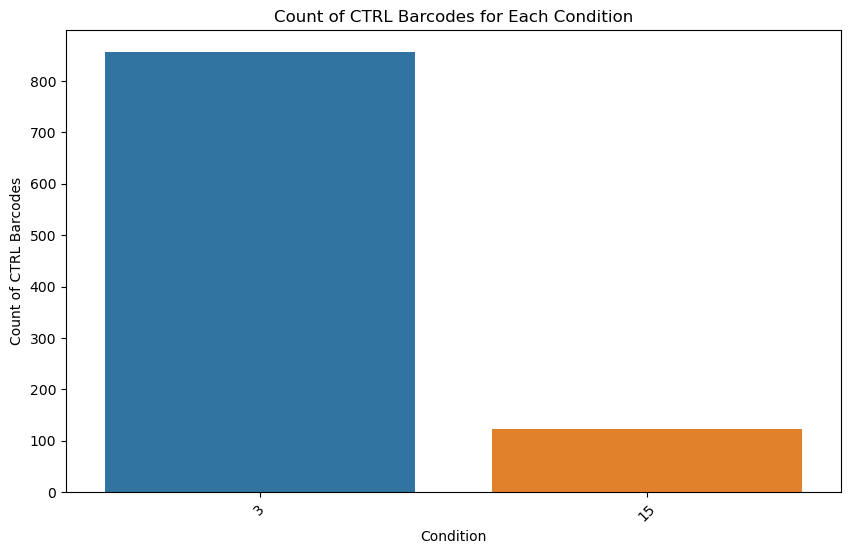

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of CTRL barcodes for each condition
condition_counts = ctrl_conditions.value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.title('Count of CTRL Barcodes for Each Condition')
plt.xlabel('Condition')
plt.ylabel('Count of CTRL Barcodes')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

## Print the matrix and save to csv

In [381]:
# Assuming count_df is your DataFrame
# Example: count_df = pd.DataFrame(...)

# If your first column 'barcode' is not the index, set it as index
if count_df.columns[0] == 'barcode':
    count_df = count_df.set_index('barcode')

# Directory where you want to save the file
directory = '../../data'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# File path for the csv file
file_path = os.path.join(directory, 'output.csv')

# Save the DataFrame to a csv file, including the index (barcode)
count_df.to_csv(file_path)

print(f"DataFrame saved to {file_path}")

DataFrame saved to ../../data/output.csv


In [382]:
count_df

barcode,AAGCGTTAGCCTCGTG-1,ATCGGATGTTGAGGAC-1,CATGGATGTGTATCCA-1,CCACGAGTCCCATAAG-1,CCGAACGAGAAACACT-1,CCGGACAGTCGACGCT-1,CGAGGCTAGAACTGAT-1,CGCCAGATCTAGAACC-1,CGCCATTAGAACGTGC-1,CGGAATTAGAGCAAGA-1,...,TTGTGGATCTAGCAAC-1,TTGTTCACAGGTCAAG-1,TTGTTTGAGCTCATAC-1,TTTACGTTCAAGGCTT-1,TTTACTGCAGCTACAT-1,TTTACTGTCATTACTC-1,TTTCACAGTGATATAG-1,TTTCACATCGATGCAT-1,TTTCATGTCCCTCTAG-1,TTTGACTGTTCCGGTG-1
Label,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
HES4,1.982747,2.213767,0.778701,1.961813,1.183782,1.786503,0.560981,1.390868,2.051576,1.494525,...,1.621794,2.052788,2.241301,0.000000,1.883256,2.679670,1.877891,1.520372,1.049049,0.763774
ISG15,0.760183,1.773268,0.000000,0.798606,0.000000,0.603272,0.918202,0.000000,0.000000,0.622888,...,0.000000,0.000000,1.335489,0.000000,1.050225,1.127936,0.802469,0.000000,0.000000,0.763774
C1QTNF12,0.000000,0.000000,0.000000,0.000000,0.000000,1.461486,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TNFRSF9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.479658,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PNMA5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BGN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.046113,0.000000,0.000000,0.000000
ATP2B3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L1CAM,0.760183,0.000000,0.000000,0.000000,0.920735,0.603272,0.918202,0.696199,0.856978,0.622888,...,0.000000,1.480421,1.335489,0.000000,0.657078,0.715220,0.479658,2.097755,0.000000,0.000000


## Test reading the Input PFA table

In [383]:
!pwd

/home2/lumpi/Projects/single-cell_samantha/code/scripts


In [384]:
import pandas as pd

# Assuming 'path' is the path to your CSV file
path="../../data/output.csv" #Please insert correct file input name

# Read the CSV file, without considering any row as header initially
data = pd.read_csv(path, header=None)

# Manually set the second row as the header
data.columns = data.iloc[1].astype(str)

# Drop the first two rows now that headers are set
data = data.drop([0, 1])

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

# Display the DataFrame to verify the header and the first few rows
print(data.head(10))

1         Label                 1.0                 0.0                 0.0  \
0          HES4  1.9827470779418945  2.2137670516967773  0.7787010669708252   
1         ISG15  0.7601826190948486  1.7732683420181274                 0.0   
2      C1QTNF12                 0.0                 0.0                 0.0   
3       TNFRSF9                 0.0                 0.0                 0.0   
4     LINC01647                 0.0                 0.0                 0.0   
5       TNFRSF8                 0.0                 0.0                 0.0   
6          KAZN                 0.0                 0.0                 0.0   
7  SLC25A34-AS1                 0.0                 0.0                 0.0   
8        TMEM82                 0.0                 0.0                 0.0   
9         MFAP2                 0.0                 0.0                 0.0   

1                 0.0                 0.0                 0.0  \
0  1.9618127346038818  1.1837815046310425  1.7865028381347656   


/tmp/ipykernel_58574/2952920651.py:7: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

In [385]:
data

1,Label,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
0,HES4,1.9827470779418945,2.2137670516967773,0.7787010669708252,1.9618127346038818,1.1837815046310425,1.7865028381347656,0.5609813928604126,1.3908679485321045,2.0515758991241455,...,1.621793508529663,2.052788496017456,2.2413008213043213,0.0,1.8832560777664185,2.6796696186065674,1.8778905868530273,1.5203723907470703,1.0490491390228271,0.7637744545936584
1,ISG15,0.7601826190948486,1.7732683420181274,0.0,0.7986063957214355,0.0,0.6032719612121582,0.9182020425796509,0.0,0.0,...,0.0,0.0,1.3354885578155518,0.0,1.0502245426177979,1.1279358863830566,0.8024693727493286,0.0,0.0,0.7637744545936584
2,C1QTNF12,0.0,0.0,0.0,0.0,0.0,1.461485743522644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TNFRSF9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.47965794801712036,0.0,0.0,0.0
4,LINC01647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,PNMA5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1611,BGN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.046113,0.0,0.0,0.0
1612,ATP2B3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1613,L1CAM,0.760183,0.0,0.0,0.0,0.920735,0.603272,0.918202,0.696199,0.856978,...,0.0,1.480421,1.335489,0.0,0.657078,0.71522,0.479658,2.097755,0.0,0.0


# Execute PFA related scripts

In [386]:
### !git clone https://github.com/AC-PHD/Seurat_PFA_pipeline.git

In [ ]:
### 10.1_prepare_data_set

In [ ]:
### 10.2_PFA_gene_selection

In [ ]:
### 10.3_validate_results

In [ ]:
### or

In [ ]:
### Seurat_PFA_pipeline/06_PFA/01_Prepare_Data_Set

In [ ]:
### Seurat_PFA_pipeline/06_PFA/02_PFA_gene_selection

In [ ]:
### Seurat_PFA_pipeline/06_PFA/03_Validate_PFA_Results